<p style="font-weight: bold; background-color: yellow; padding: 10px; display: inline;">TODO</p>

- overview of data processing (ingestion, preprocessing)

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
import ray
import sys
import warnings
from utils import show
sys.path.append(os.path.abspath("../"))
warnings.filterwarnings("ignore")

### Data ingestion

In [ ]:
# Load data
ds = ray.data.read_images(
    "s3://doggos-dataset/train", 
    include_paths=True, 
    shuffle="files",
)
ds = ds.materialize()
ds.take(1)

2025-03-25 18:20:03,011	INFO worker.py:1636 -- Connecting to existing Ray cluster at address: 10.0.27.125:6379...
2025-03-25 18:20:03,021	INFO worker.py:1812 -- Connected to Ray cluster. View the dashboard at https://session-3apyclh1wkjd883fht6vsy8xjh.i.anyscaleuserdata.com 
2025-03-25 18:20:03,031	INFO packaging.py:393 -- Pushing file package 'gcs://_ray_pkg_d9fb9211f94d11a9d01f713614fed8ef4bd5e5bc.zip' (3.28MiB) to Ray cluster...
2025-03-25 18:20:03,066	INFO packaging.py:406 -- Successfully pushed file package 'gcs://_ray_pkg_d9fb9211f94d11a9d01f713614fed8ef4bd5e5bc.zip'.
2025-03-25 18:20:04,897	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2025-03-25_18-18-54_123030_161799/logs/ray-data
2025-03-25 18:20:04,898	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ListFiles] -> AllToAllOperator[RandomShuffle] -> TaskPoolMapOperator[PartitionFiles] -> TaskPoolMapOperator[ReadFiles

Running 0: 0.00 row [00:00, ? row/s]

- ListFiles 1: 0.00 row [00:00, ? row/s]

- RandomShuffle 2: 0.00 row [00:00, ? row/s]

Shuffle Map 3:   0%|          | 0.00/1.00 [00:00<?, ? row/s]

Shuffle Reduce 4:   0%|          | 0.00/1.00 [00:00<?, ? row/s]

- PartitionFiles 5: 0.00 row [00:00, ? row/s]

- ReadFiles 6: 0.00 row [00:00, ? row/s]

2025-03-25 18:20:27,929	INFO dataset.py:2631 -- Tip: Use `take_batch()` instead of `take() / show()` to return records in pandas or numpy batch format.
2025-03-25 18:20:27,932	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2025-03-25_18-18-54_123030_161799/logs/ray-data
2025-03-25 18:20:27,932	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> LimitOperator[limit=1]


Running 0: 0.00 row [00:00, ? row/s]

- limit=1 1: 0.00 row [00:00, ? row/s]

[{'image': array([[[ 48,  79,  38],
          [ 49,  80,  39],
          [ 50,  76,  37],
          ...,
          [ 63, 102,  35],
          [ 61, 100,  37],
          [ 59,  98,  35]],
  
         [[ 50,  81,  40],
          [ 52,  83,  42],
          [ 54,  80,  41],
          ...,
          [ 58,  94,  30],
          [ 57,  93,  31],
          [ 55,  91,  30]],
  
         [[ 52,  83,  42],
          [ 55,  86,  45],
          [ 58,  84,  45],
          ...,
          [ 53,  82,  24],
          [ 52,  81,  25],
          [ 51,  80,  24]],
  
         ...,
  
         [[ 96,  82,  79],
          [ 92,  78,  75],
          [ 87,  73,  70],
          ...,
          [ 16,  15,  20],
          [ 13,  12,  17],
          [ 12,  11,  16]],
  
         [[ 87,  73,  70],
          [ 85,  71,  68],
          [ 84,  70,  67],
          ...,
          [ 18,  17,  22],
          [ 15,  14,  19],
          [ 13,  12,  17]],
  
         [[ 84,  70,  67],
          [ 85,  71,  68],
          [ 87,

<p style="font-weight: bold; background-color: yellow; padding: 10px; display: inline;">TODO</p>

- include a best practice section that talks about how we should experiment with a small dataset first (so we can inspect quickly)
- link to Ray data io
- explain how distributed read works (and not needing to load on disk)
- change to shuffling by files
- see alterantives to random shuffling
- confirm need for materialization
- explain materialization in a diagram (add this to docs as well)
- doc page on [shuffling](https://docs.ray.io/en/latest/data/shuffling-data.html)
- doc page on [data loading](https://docs.ray.io/en/latest/data/loading-data.html)
- quickly mention the object store


### Add class

<p style="font-weight: bold; background-color: yellow; padding: 10px; display: inline;">TODO</p>

- overall diagram for this section (more detailed than overall e2e)
- mention autoscaling, fault tolerance, etc.
- mention chaining heterogenous workloads

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from doggos.utils import add_class
show(add_class)

```python
def add_class(row):
    row["class"] = row["path"].rsplit("/", 3)[-2]
    return row

```

**Note**: If you make a change to any of the code that we import from our python scripts and want to run the workload, we need to restart Ray so that our worker nodes can receive the updated code. This is only required when making changes in jupyter notebooks because Ray sessions are always restarted normally in other scenarios. 
```python
ray.shutdown()
ray.init()
```

In [ ]:
# Add class
ds = ds.map(add_class)

<p style="font-weight: bold; background-color: yellow; padding: 10px; display: inline;">TODO</p>

- add other input args to map
- explain map in a diagram
- show new Ray Data Dashboard updates

2025-02-19 21:44:38,990	INFO streaming_executor.py:108 -- Starting execution of Dataset. Full logs are in /tmp/ray/session_2025-02-19_20-21-51_646153_2288/logs/ray-data
2025-02-19 21:44:38,991	INFO streaming_executor.py:109 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[Map(add_class)] -> LimitOperator[limit=5]


Running 0: 0.00 row [00:00, ? row/s]

- Map(add_class) 1: 0.00 row [00:00, ? row/s]

- limit=5 2: 0.00 row [00:00, ? row/s]

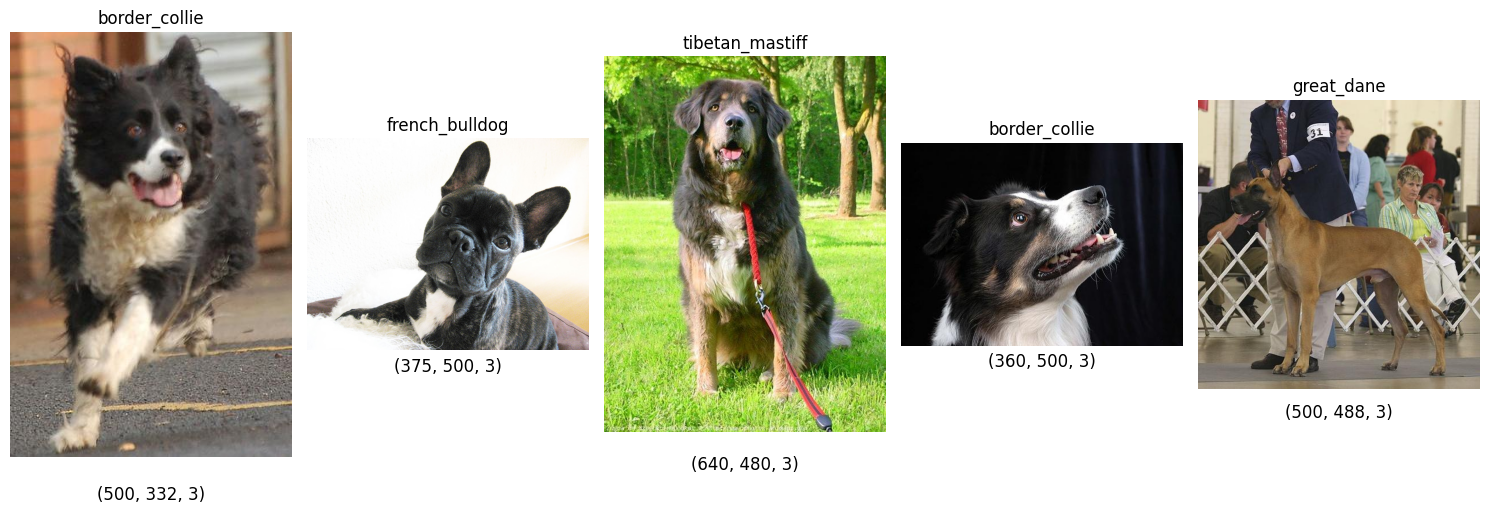

In [ ]:
# Sample images
num_samples = 5
samples = ds.take(num_samples)
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for ax, sample in zip(axes, samples):
    ax.imshow(sample["image"])
    ax.axis("off")
    ax.set_title(sample["class"], fontsize=12)
    ax.text(0.5, -0.1, np.shape(sample["image"]), fontsize=12, ha="center", transform=ax.transAxes)
plt.tight_layout()
plt.show()

In [ ]:
import IPython
IPython.get_ipython().kernel.do_shutdown(restart=True)

{'status': 'ok', 'restart': True}

: 